# #AND 이해하기

In [34]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [35]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

#AND-gate
y_data = [[0],
          [0],
          [0],
          [1]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [36]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

Hypothesis

In [37]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [38]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [39]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

Train !

In [40]:
sess = tf.Session()

In [41]:
sess.run(tf.global_variables_initializer())

In [42]:
vcost =[]

In [43]:
for step in range(10001):

  cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
  vcost.append(cost1)
  if step %1000 ==0:
    print(cost1)

3.026573
0.63156044
0.45348126
0.35801905
0.29838187
0.25706905
0.22639397
0.20251545
0.18329391
0.16743241
0.15409139


Text(0.5, 0, 'epoch')

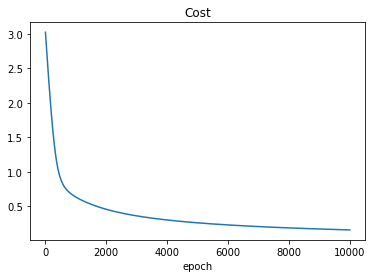

In [44]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

Test !

In [45]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})

In [46]:
print(test1[0][0])

0.77189916


In [47]:
for i in range(4):  
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})  
  print(i, x_data[i], y_data[i] , '---- predicted : ',test1 )

0 [0. 0.] [0.] ---- predicted :  [[0.01048756]]
1 [0. 1.] [0.] ---- predicted :  [[0.15886712]]
2 [1. 0.] [0.] ---- predicted :  [[0.15959096]]
3 [1. 1.] [1.] ---- predicted :  [[0.77189916]]


In [48]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 
print(acc1)

1.0


In [49]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]}) #틀린 값
print(test1[0][0])

0.013946972
